In [107]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import polyval, polyfit

In [245]:
def flatten_and_mask_shots(shots, mask,):
    num_shots = shots.shape[0]
    size = shots.shape[1]*shots.shape[2]
    flat_mask = mask.reshape(size)
    flat_shots =  shots.reshape( (num_shots,size))*flat_mask
    
    return flat_shots[:,flat_mask]

def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

In [295]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/flatfield_calibration/full_det_imgs/fullImgs_run69.h5','r')
print f.keys()
shape = f['full_img'].shape
f_mask = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/masks/run69_masks.h5','r')
# flat_mask = mask.reshape(shape[1]*shape[2])
mask = f_mask['mask'].value


[u'ebeam', u'event_time', u'evr', u'fiducials', u'full_img', u'gas_detector', u'phase_cav']


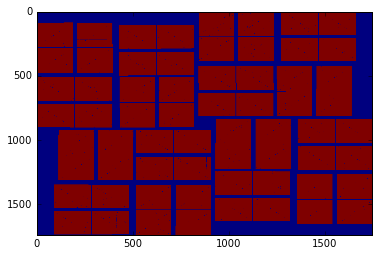

In [385]:
plt.imshow(f_mask['psana_mask'],aspect='auto')

In [299]:
test_shots = f['full_img'][:1000]*mask
flattened_shots = flatten_and_mask_shots(test_shots,mask)
# unflattened_shots = unflatten_shots(flattened_shots,mask)

# np.all(test_shots*mask==unflattened_shots)

In [346]:
total_intensity = flattened_shots.mean(-1)
delta=10
bins = np.arange(0.0,1000,delta) #use universal bins
labels = np.digitize(total_intensity,bins)
unique_bins=np.unique(labels[labels>0])
bin_centers_with_shots =  bins[unique_bins]-delta/2.
num_shots_per_bin = np.array([np.sum(labels==ll) for ll in unique_bins])
# diff = np.zeros_like(test_shots[0])
# diff[mask] = (test_shots[1]/ints[1])[mask]/(test_shots[0]/ints[0])[mask] -1
# print ints

In [358]:
ave_shots = np.zeros( (unique_bins.size, flattened_shots.shape[-1]))
std_shots = np.zeros_like(ave_shots)
for idx, ii in enumerate(unique_bins):
    
    inds=np.where(labels==ii)[0]
    shots=flattened_shots[inds]
    std_shots[idx] = shots.std(0)/ np.sqrt(float(len(inds)))
    ave_shots[idx] = shots.mean(0)

In [364]:
unflattened_shots = unflatten_shots(ave_shots,mask)
unflattened_std = unflatten_shots(std_shots,mask)

array([ 16, 493, 489])

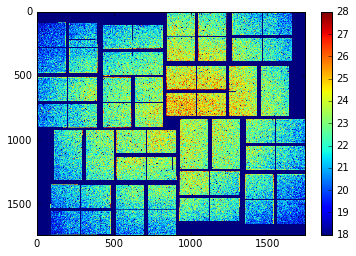

In [382]:
ave_shots.shape
plt.imshow(unflattened_shots[2]*mask,aspect='auto',vmax=28,vmin=18)
# plt.imshow((unflattened_std[2]*mask),aspect='auto',vmax=1.25,vmin=0.8)
plt.colorbar()
num_shots_per_bin

In [383]:
bc1=np.array([5,15,25])
bc2 = np.array([25,65,75])

num1=np.array([100,200,300])

num2=np.array([34,35,60])

all_centers = np.unique(np.concatenate([bc1,bc2]))
all_nums = np.zeros_like(all_centers)

for

array([ 5, 15, 25, 25, 65, 75])

In [347]:
# label 0 does not fit into the histogram
bin_centers_with_shots =  bins[unique_bins]-delta/2.
print unique_bins
np.where(labels==0)[0]
total_intensity[np.where(labels==0)[0]].max()
print num_shots_per_bin

[1 2 3]
[ 16 493 489]


In [ ]:
# gather shots
bins = np.linspace(5,24,20) #use universal bins
labels = np.digitize(total_intensity,bins)
# total_intensity.shape
unique_bins=np.unique(labels)
ave_shots = np.zeros( (unique_bins.size-1, f['full_img'].shape[1],f['full_img'].shape[2]))
std_shots = np.zeros_like(ave_shots)
for ii in unique_bins:
    
    inds=np.where(labels==ii)[0]
    shots=test_shots[list(inds)]
    std_shots[ii-1] = shots.std(0)/ np.sqrt(float(len(inds)))
    ave_shots[ii-1] = shots.mean(0)

28.089005

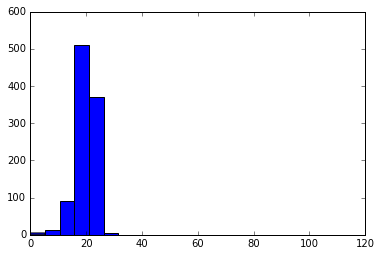

In [306]:
plt.hist(ints,bins=np.linspace(0,100,20))
ints.max()

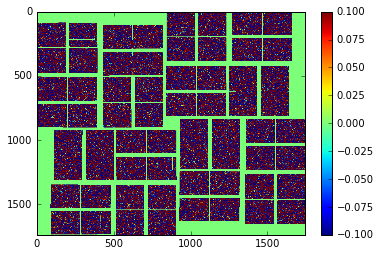

In [285]:
plt.imshow(diff, aspect='auto',vmin = -0.1, vmax =0.1)
plt.colorbar()

In [3]:
total_intensity = f['full_img'].value.mean(-1)
total_intensity = total_intensity.mean(-1)

In [54]:
bins = np.linspace(5,24,20)
labels = np.digitize(total_intensity,bins)
# total_intensity.shape
unique_bins=np.unique(labels)
ave_shots = np.zeros( (unique_bins.size-1, f['full_img'].shape[1],f['full_img'].shape[2]))
std_shots = np.zeros_like(ave_shots)
for ii in unique_bins:
    
    inds=np.where(labels==ii)[0]
    shots=f['full_img'][list(inds)]
    std_shots[ii-1] = shots.std(0)/ np.sqrt(float(len(inds)))
    ave_shots[ii-1] = shots.mean(0)

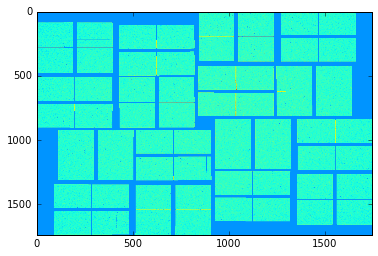

In [60]:
plt.imshow(ave_shots[5], aspect='auto')

In [102]:
#mask flat
ave_bin_int = ave_shots.mean(-1).mean(-1)
flat_ave_shots =  (ave_shots.reshape( (ave_bin_int.size,
                                       ave_shots.shape[1]*ave_shots.shape[2])))*flat_mask
flat_ave_shots = flat_ave_shots[:,flat_mask]
flat_std_shots = (std_shots.reshape( (ave_bin_int.size,
                                       ave_shots.shape[1]*ave_shots.shape[2])))*flat_mask
flat_std_shots = flat_std_shots[:,flat_mask]
flat_ave_shots.shape

(18, 1181147)

In [117]:
# fit to polynomial
degree = 5
poly_coefs = np.zeros( (100,degree+1) )
for ii in range(100):
    y = flat_ave_shots[:,ii]
    cc = polyfit(ave_bin_int, y, degree)
    poly_coefs[ii] = cc


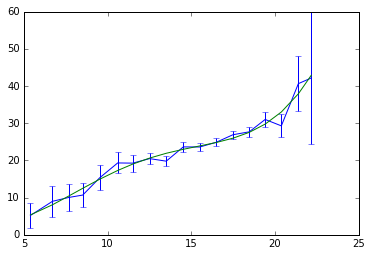

In [130]:
x = 40
plt.errorbar(ave_bin_int, flat_ave_shots[:,x],yerr=flat_std_shots[:,x])
plt.plot(ave_bin_int, polyval(poly_coefs[x],ave_bin_int) )

In [150]:
n_shots = 200
calibrated = np.zeros((n_shots,100))
uncalibrated = np.zeros((n_shots,100))

for jj in range(n_shots):
    test_shot = f['full_img'][jj]
    test_int = test_shot.mean(-1).mean(-1)
#     print test_int
    if test_int<5.0:
        continue
    test_shot = test_shot*mask
   
    flat_test_shot = test_shot.reshape( ave_shots.shape[1]*ave_shots.shape[2])*flat_mask
    flat_test_shot = flat_test_shot[flat_mask][:100]
    uncalibrated[jj] = flat_test_shot
    
    calibrated_test_shot =np.array( [polyval(poly_coefs[ii], test_int) for ii in range(100)])
    calibrated[jj] = calibrated_test_shot
    
#     print calibrated_test_shot[40]
#     plt.subplot(211)
#     plt.plot(flat_test_shot)
#     plt.subplot(212)
#     plt.plot(calibrated_test_shot)

0.629970053834 1.66110473339


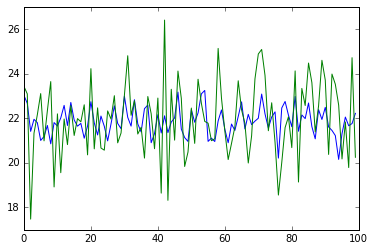

In [156]:
plt.plot(calibrated.mean(0))
plt.plot(uncalibrated.mean(0))

print calibrated.mean(0).std(),uncalibrated.mean(0).std()

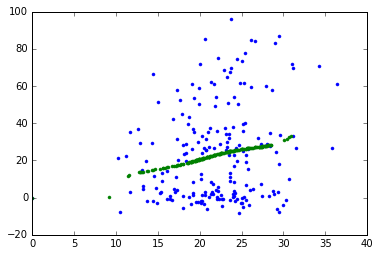

In [153]:
x=90
plt.plot(uncalibrated.mean(-1), uncalibrated[:,x],'.')
plt.plot(calibrated.mean(-1), calibrated[:,x],'.')

(array([   5.,   10.,   20.,   36.,   48.,   77.,  109.,  232.,  327.,
         406.,  519.,  598.,  595.,  394.,  207.,   70.,   18.,    3.,    0.]),
 array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.]),
 <a list of 19 Patch objects>)

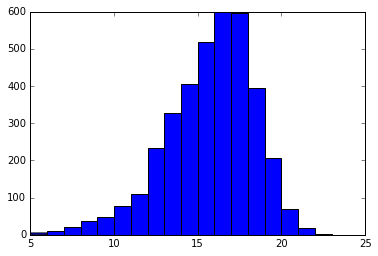

In [157]:
plt.hist(total_intensity, bins)

In [20]:
n_shots = 
calibrated = np.zeros((n_shots,100))
uncalibrated = np.zeros((n_shots,100))

for jj in range(n_shots):
    test_shot = f['full_img'][jj]
    test_int = test_shot.mean(-1).mean(-1)
#     print test_int
    if test_int<5.0:
        continue
    test_shot = test_shot*mask
   
    flat_test_shot = test_shot.reshape( ave_shots.shape[1]*ave_shots.shape[2])*flat_mask
    flat_test_shot = flat_test_shot[flat_mask][:100]
    uncalibrated[jj] = flat_test_shot
    
    calibrated_test_shot =np.array( [polyval(poly_coefs[ii], test_int) for ii in range(100)])
    calibrated[jj] = calibrated_test_shot

(array([ 117,  392,  407,  408,  410,  448,  661,  697,  963,  968, 1179,
        1199, 1284, 1292, 1299, 1312, 1356, 1392, 1413, 1416, 1437, 1452,
        1475, 1476, 1477, 1479, 1792, 1799, 1828, 1832, 1839, 1867, 1911,
        2022, 2058, 2064, 2088, 2134, 2148, 2154, 2162, 2164, 2212, 2508,
        2514, 2519, 2520, 2558, 2590, 2594, 2611, 2612, 2620, 2623, 2668,
        2670, 2676, 2682, 2685, 2713, 2714, 2718, 2724, 2732, 2758, 2793,
        2827, 2874, 2920, 2953, 3007, 3059, 3061, 3077, 3079, 3094, 3101,
        3213, 3323, 3426, 3432, 3433, 3446, 3464, 3465, 3471, 3508, 3509,
        3514, 3526, 3532]),)

In [191]:
# let's evaluate the effectiveness of the flatfield correction
ref = ave_shots[9]
test_shot = ave_shots[0]

diff = np.zeros_like(ref)
diff[mask] = (test_shot/ ave_bin_int[0] )[mask]/(ref/ave_bin_int[9])[mask]-1

ref = ave_shots[9]
# test_shot = flat_ave_shots[2]


# diff = (test_shot/test_shot.sum())/(ref/ref.sum()-1)
# plt.plot(diff[:100])

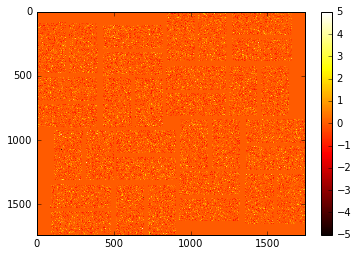

In [192]:
plt.imshow(diff*mask,aspect='auto', vmax=5, vmin=-5, cmap = 'hot')
plt.colorbar()

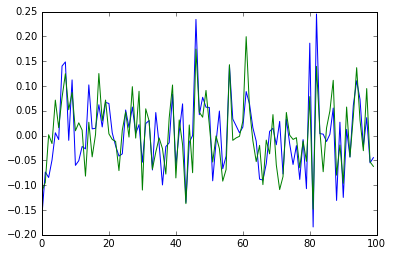

In [220]:
ind = 12
ref = flat_ave_shots[9][:100]
test_shot = flat_ave_shots[ind][:100]


diff = (test_shot/test_shot.sum())/(ref/ref.sum())-1
calibrated_test_shot =np.array( [polyval(poly_coefs[ii], ave_bin_int[ind]) for ii in range(100)])
calibrated_diff = (calibrated_test_shot/calibrated_test_shot.sum())/(ref/ref.sum())-1

plt.plot(diff)
plt.plot(calibrated_diff)

In [203]:
polyval(ave_bin_int[9])

TypeError: polyval() takes exactly 2 arguments (1 given)

In [86]:
(shots.std(0)/np.sqrt(3))[x,y]

14.497514

In [168]:
ave_shots.shape

(18, 1738, 1742)

In [193]:
np.where(diff>0)

(array([   1,    1,    1, ..., 1736, 1736, 1736]),
 array([842, 844, 845, ..., 890, 898, 900]))

In [181]:

diff[1,842]

1.8867791282899156

In [195]:
diff.max()

365.06734546358956

In [196]:
ave_bin_int

array([  5.3864021 ,   6.70276115,   7.66422646,   8.51090511,
         9.51978346,  10.59982692,  11.49844865,  12.50539581,
        13.49932661,  14.51929137,  15.50650615,  16.48387968,
        17.48337399,  18.45826497,  19.40990973,  20.37597659,
        21.39310408,  22.16504431])